In [102]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from gwaxion import physics
import pandas as pd

mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 0.5
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Computer Modern Roman'
}
matplotlib.rcParams.update(mplparams)

In [103]:
# create an array of BH masses

distance = 5E6 * physics.PC_SI
mbhs = np.linspace(1, 1000, 10)
chis = np.linspace(0.5, 0.9, 5)

rows = []
for mbh in mbhs:
    for chi in chis:
        bh = physics.BlackHole(mass=mbh, chi=chi, msun=True)
        h0s, fgws, alphas = bh.scan_alphas(alpha_max=0.5, delta_alpha=0.001)
        row = {
            'mbh': mbh,
            'h0_max': h0s.max(),
            'fgw_max': fgws[np.where(h0s==h0s.max())][0],
            'chi': chi,
        }
        rows.append(row)
df = pd.DataFrame(rows)

print df.head()

   chi       fgw_max    h0_max  mbh
0  0.5   7483.891561  0.000006  1.0
1  0.6   9281.879684  0.000027  1.0
2  0.7  11329.960892  0.000098  1.0
3  0.8  13750.582834  0.000323  1.0
4  0.9  16786.468630  0.001001  1.0


In [104]:
from matplotlib import cm

cs = [cm.magma(x) for x in np.linspace(0.1, 0.8, len(chis))]
lws = np.linspace(1, 4, len(chis))

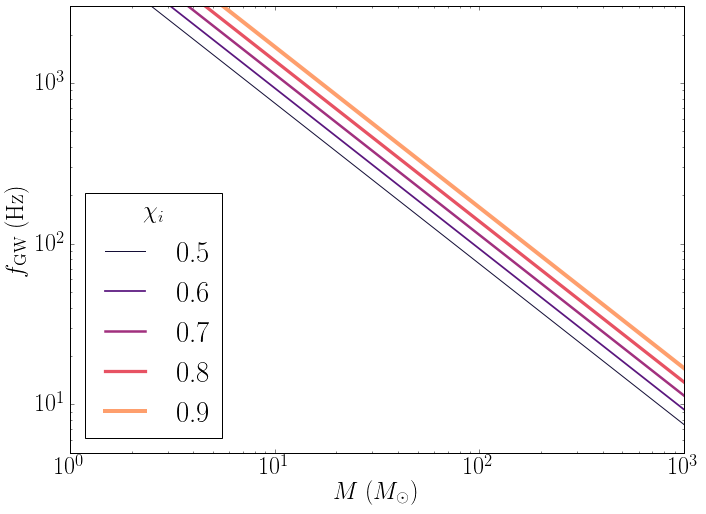

In [105]:
grouped = df.groupby('chi')

fig, ax = plt.subplots(1, figsize=(11,8))

for chi, c, lw in zip(chis, cs, lws):
    df_chi = grouped.get_group(chi)
    ax.plot(df_chi['mbh'], df_chi['fgw_max'], label="%.1f" % chi, lw=lw, c=c)

ax.set_xlabel(r'$M$ ($M_\odot$)')
ax.set_ylabel(r'$f_{\rm GW}$ (Hz)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower left', title=r"$\chi_i$")
plt.ylim(5, 3E3)

plt.show(ax)
plt.close()

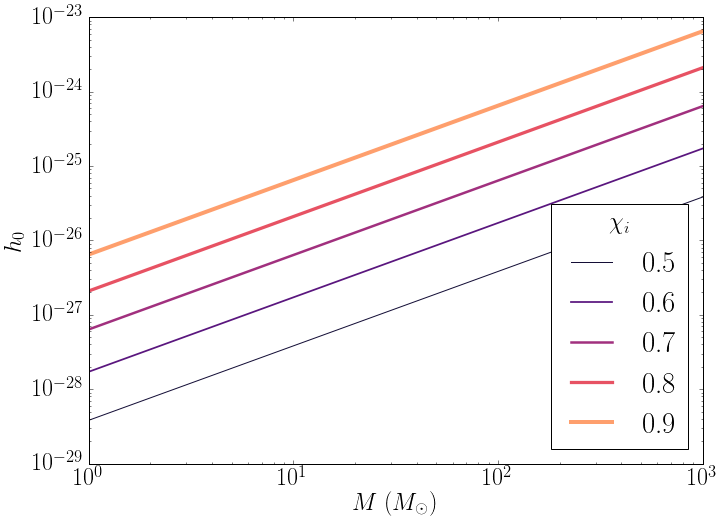

In [106]:
fig, ax = plt.subplots(1, figsize=(11,8))
for chi, c, lw in zip(chis, cs, lws):
    df_chi = grouped.get_group(chi)
    ax.plot(df_chi['mbh'], df_chi['h0_max']/distance, label="%.1f" % chi, lw=lw, c=c)

ax.set_xlabel(r'$M$ ($M_\odot$)')
ax.set_ylabel(r'$h_0$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right', title=r"$\chi_i$")

plt.show(ax)
plt.close()

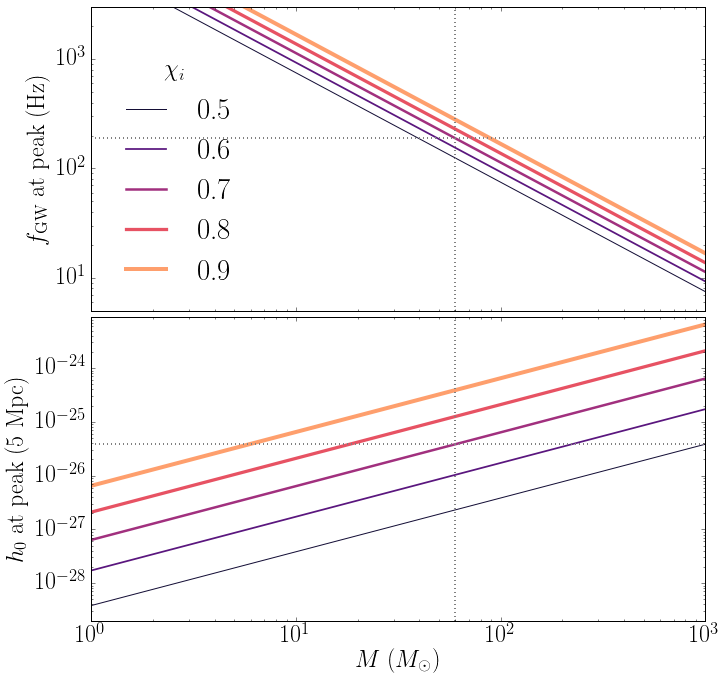

In [120]:
# joint plot

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(11,11))

for chi, c, lw in zip(chis, cs, lws):
    df_chi = grouped.get_group(chi)

    ax1.plot(df_chi['mbh'], df_chi['fgw_max'], label="%.1f" % chi, lw=lw, c=c)
    ax2.plot(df_chi['mbh'], df_chi['h0_max']/distance, label="%.1f" % chi, lw=lw, c=c)

plt.subplots_adjust(wspace=0, hspace=0.02)
    
ax2.set_xlabel(r'$M$ ($M_\odot$)')
ax2.set_ylabel(r'$h_0$ at peak (5 Mpc)')
ax1.set_ylabel(r'$f_{\rm GW}$ at peak (Hz)')
ax1.set_ylim(5, 3E3)
ax2.set_ylim(2E-29, 9E-24)

for ax in [ax1, ax2]:
    ax.axvline(60, lw=2, c='gray', ls=':')
    ax.set_xscale('log')
    ax.set_yscale('log')

ax1.axhline(188.93913803, lw=2, c='gray', ls=':')
ax2.axhline(3.82699460604e-26, lw=2, c='gray', ls=':')
    
ax1.legend(loc='lower left', title=r"$\chi_i$", frameon=False)

fig.savefig("plot_peak_mbh_chi.pdf", bbox_inches='tight')

plt.show(ax)
plt.close()
